In [132]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [170]:
def drift1(x):
    return -x

def drift2(x):
    return -10*x*(x**2 - 4)

g = 0.1

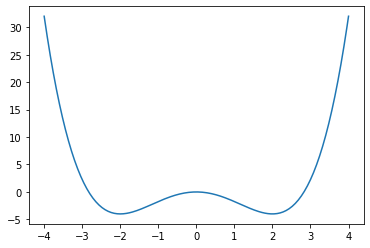

In [171]:
# double-well that corresponds to drift2
def pot2(x):
    return (x**4/4 - 2*x**2)

xcor = np.linspace(-4,4,201)
plt.plot(xcor, pot2(xcor))
plt.show()

In [172]:
# simulation parameters

# step size
dt = 1e-4

# final time = numsteps*dt
numsteps = 10000

# many sample paths
numpaths = 10000

# to store everything
# each row is a different realization or sample path
# each column is a different step in time; first column is t=0
x = np.zeros((numpaths, numsteps+1))

# to change initial condition, change x[:,0]

In [173]:
# np.random.standard_cauchy(size=10)

In [174]:
# this is for alpha = 1
# in general, we'd have to use Z*(dt**(1.0/alpha)), 
# with Z ~ Levy(alpha) distribution.

for i in range(numsteps):
    # need a random sample from the Cauchy distribution
    Z = np.random.standard_cauchy(size=numpaths)
    x[:, i+1] = x[:, i] + drift2(x[:, i])*dt + g*Z*dt
    

<ipython-input-170-042a88aa3e22>:5: RuntimeWarning: overflow encountered in square
  return -10*x*(x**2 - 4)
<ipython-input-174-7d864519f040>:8: RuntimeWarning: invalid value encountered in add
  x[:, i+1] = x[:, i] + drift2(x[:, i])*dt + g*Z*dt
<ipython-input-170-042a88aa3e22>:5: RuntimeWarning: overflow encountered in multiply
  return -10*x*(x**2 - 4)


In [175]:
infrows, infcols = np.where(np.isinf(x))
print("Found " + str(len(list(set(infrows)))) + " infinite rows, deleting them!")
x = np.delete(x, infrows, axis=0)
print(x.shape)

Found 11 infinite rows, deleting them!
(9989, 10001)


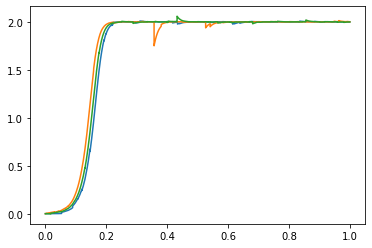

In [176]:
tvec = np.arange(numsteps+1)*dt
plt.plot(tvec, x[4,:])
plt.plot(tvec, x[55,:])
plt.plot(tvec, x[98,:])
plt.show()

In [177]:
import scipy.stats as ss

In [178]:
kernel = ss.gaussian_kde(x[:,numsteps])

In [179]:
ind = np.linspace(-8,8,1001)
kdepdf = kernel.evaluate(ind)

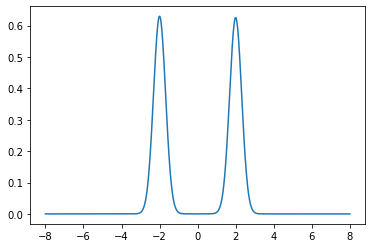

In [180]:
plt.plot(ind, kdepdf)
plt.show()